In [26]:
#load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#load the data
df = pd.read_excel('Cold and Flu Data.xlsx')
df.head()

,Item,ItemDesc,Group,Posting Year,Month No,Posting Month,Quantity,CostAmount,SalesAmount
0,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,3,March,4,1516.0,2380.00
1,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,4,April,4,1516.0,2350.25
2,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,5,May,8,3032.0,4641.00
3,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,6,June,8,3032.0,4730.25
4,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,7,July,6,2274.0,3510.50


In [28]:
#create a Date column
df['Date'] = pd.to_datetime(df['Posting Year'].astype(str)+ '-' + df['Month No'].astype(str) + '-1', errors='coerce')
df.head()

,Item,ItemDesc,Group,Posting Year,Month No,Posting Month,Quantity,CostAmount,SalesAmount,Date
0,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,3,March,4,1516.0,2380.00,2022-03-01
1,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,4,April,4,1516.0,2350.25,2022-04-01
2,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,5,May,8,3032.0,4641.00,2022-05-01
3,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,6,June,8,3032.0,4730.25,2022-06-01
4,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,7,July,6,2274.0,3510.50,2022-07-01


In [29]:
#aggregate the data according to the date
df2 = df.groupby('Date')['Quantity'].sum().reset_index()
print(df2)

         Date  Quantity
0  2022-01-01       575
1  2022-02-01       390
2  2022-03-01       614
3  2022-04-01       539
4  2022-05-01       772
5  2022-06-01      1039
6  2022-07-01       706
7  2022-08-01       462
8  2022-09-01       527
9  2022-10-01       770
10 2022-11-01       664
11 2022-12-01      1084
12 2023-01-01       573
13 2023-02-01       443
14 2023-03-01       647
15 2023-04-01       640
16 2023-05-01       600
17 2023-06-01       611
18 2023-07-01       633
19 2023-08-01       577
20 2023-09-01       606
21 2023-10-01       574
22 2023-11-01       574
23 2023-12-01       755


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      24 non-null     datetime64[ns]
 1   Quantity  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 516.0 bytes


<Figure size 1600x900 with 0 Axes>

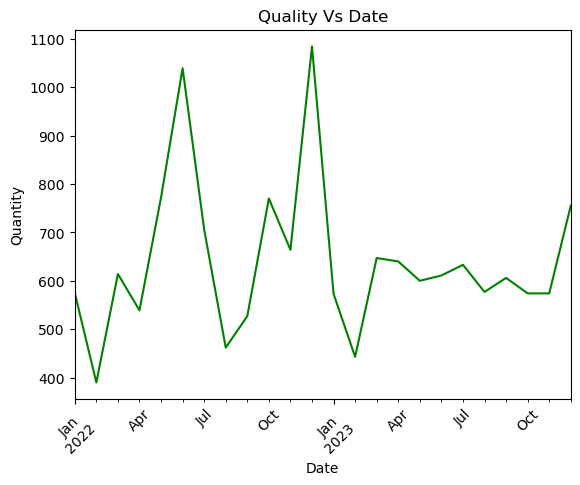

In [31]:
#plot Quality against Date
plt.figure(figsize=(16, 9))
df2.plot(x = 'Date', y = 'Quantity', kind = 'line', rot = 45, legend = False, color = 'green')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quality Vs Date')
plt.show()

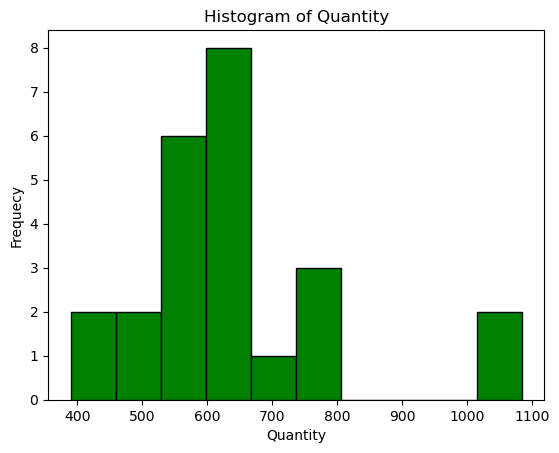

In [32]:
#check on the distribution using a Histogram
plt.hist(df2['Quantity'], bins = 10, color = 'green', edgecolor = 'black')
plt.xlabel('Quantity')
plt.ylabel('Frequecy')
plt.title('Histogram of Quantity')
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
#check stationarity of the data
def adfuller_test(sales):
    results = adfuller(sales)
    labels = ['ADF test statistic', 'p-value', 'No of lags used', 'No of observations used']
    for value, label in zip(results, labels):
        print(label +' : '+ str(value))
    if results[1] <= 0.05:
        print("It is stationary")
    else:
        print("It is not stationary")

In [35]:
adfuller_test(df2['Quantity'])

ADF test statistic : -3.9266661519272716
p-value : 0.0018471319728820732
No of lags used : 0
No of observations used : 23
It is stationary


# AUTO REGRESSIVE MODEL

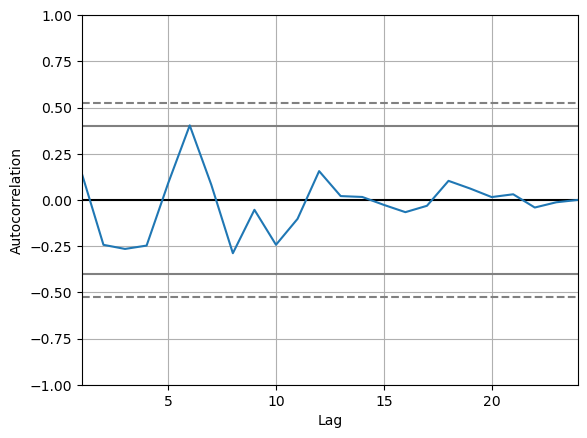

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Quantity'])
plt.show()

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

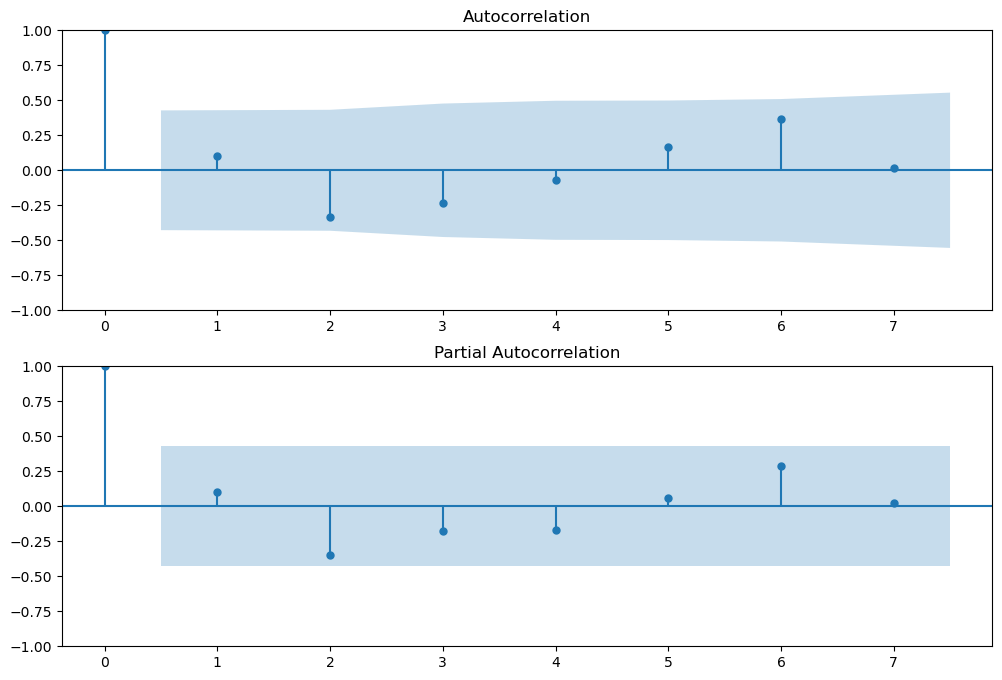

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['Quantity'].iloc[3:], lags= 7, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['Quantity'].iloc[3:], lags= 7, ax = ax2)

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
df3 = df2.set_index('Date')
df3['Quantity'] = pd.to_numeric(df3['Quantity'], errors='coerce')
print(df3.isnull().sum())

Quantity    0
dtype: int64


In [62]:
train_size = int(len(df3) * 0.6)
validation_size = int(len(df3) * 0.25)

train, validation, test = df3[:train_size], df3[train_size:(train_size + validation_size)], df3[(train_size + validation_size):]

print("Training set size:", len(train))
print("Validation set size:", len(validation))
print("Test set size:", len(test))

Training set size: 14
Validation set size: 6
Test set size: 4


In [81]:
model = ARIMA(train, order=(3,2,1))
model_fit = model.fit()

C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   14
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 -85.007
Date:                Wed, 17 Jan 2024   AIC                            180.015
Time:                        15:00:26   BIC                            182.439
Sample:                    01-01-2022   HQIC                           179.117
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3205      0.579     -0.554      0.580      -1.455       0.814
ar.L2         -0.2358      0.502     -0.470      0.638      -1.219       0.747
ar.L3         -0.2458      0.487     -0.504      0.614      -1.201       0.709
ma.L1         -0.9927     35.009     -0.028      0.977     -69.610      67.625
sigma2      6.308e+04   2.21e+06      0.029      0.977   -4.26e+06    4.39e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.63   Prob(JB):                         0.72
Heteroskedasticity (H):               3.16   Skew:                             0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         1.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

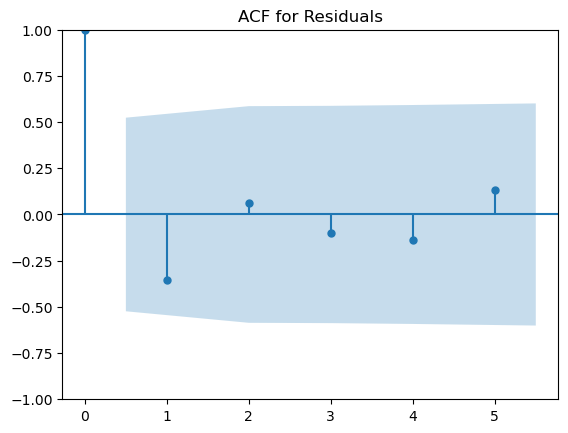

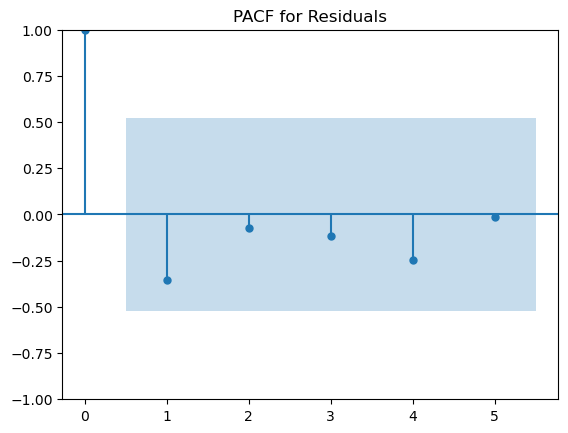

In [83]:
residuals = model_fit.resid

# Create ACF plot
plot_acf(residuals, lags=5, alpha=0.05)
plt.title('ACF for Residuals')
plt.show()

# Create PACF plot
plot_pacf(residuals, lags=5, alpha=0.05)
plt.title('PACF for Residuals')
plt.show()

In [84]:
predictions = model_fit.predict(start=len(train), end=len(train) + len(validation) - 1, typ='levels')
predictions.head()

C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2023-03-01    510.769581
2023-04-01    654.198103
2023-05-01    633.077870
2023-06-01    598.229468
2023-07-01    587.982008
Freq: MS, Name: predicted_mean, dtype: float64

# EVALUATE THE MODEL

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(validation, predictions)
mae = mean_absolute_error(validation, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 3896.570861009217
Mean Absolute Error: 46.30602178949249


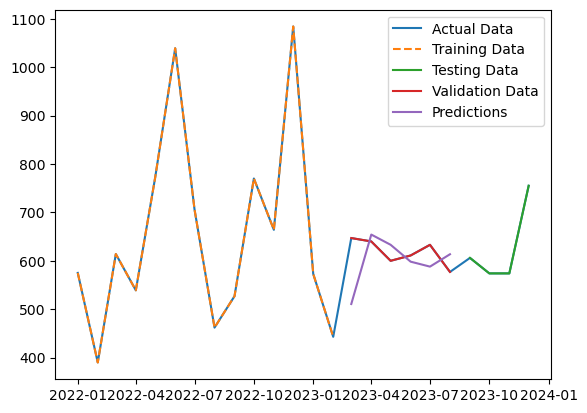

In [86]:
#visualize the data
plt.plot(df3, label='Actual Data')
plt.plot(train, label='Training Data', linestyle='--')
plt.plot(test, label='Testing Data')
plt.plot(validation, label='Validation Data')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

In [87]:
steps = 3
forecast = model_fit.forecast(steps=steps)

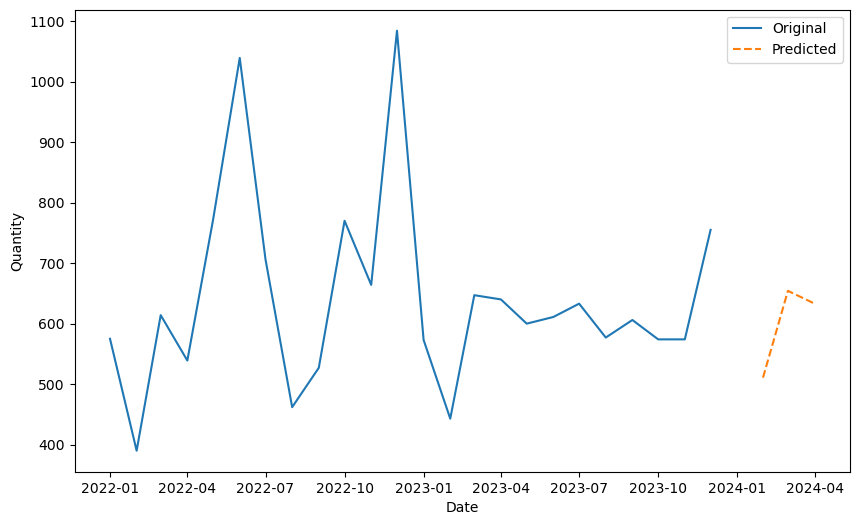

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['Quantity'], label='Original')

# Plot the predicted values
future_dates = pd.date_range(start=df2['Date'].iloc[-1], periods=steps + 1, freq='M')[1:]
plt.plot(future_dates, forecast, label='Predicted', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [53]:
#export predictions
df_predictions = pd.DataFrame({'Predictions': forecast})

# Export to CSV
df_predictions.to_csv('predicted_values.csv')
